In [1]:
%matplotlib inline

import numpy as np
from numpy.linalg import inv, det
import matplotlib.pyplot as plt
import os

os.makedirs("figs", exist_ok=True)
    
r = range(-50, 51)
z = np.array([(x, y) for x in r for y in r])
    
def axes(ax, xlim=(-3, 10), ylim=(-2, 8)):
    xlim = np.array(xlim)*1.1
    ylim = np.array(ylim)*1.1
    ax.set_aspect("equal", adjustable="box")
    ax.plot(xlim, [0,0], zorder=1, color="#555555")
    ax.plot([0,0], ylim, zorder=1, color="#555555")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.axis("off")
    
def lattice(ax, b1, b2, **kwargs):
    b = np.array([b1, b2])
    l = z @ b
        
    ax.scatter(*zip(*l), zorder=2, **kwargs)
    ax.quiver([0, 0], [0, 0], b[:,0], b[:,1], scale_units="xy", scale=1, width=.005, zorder=3)


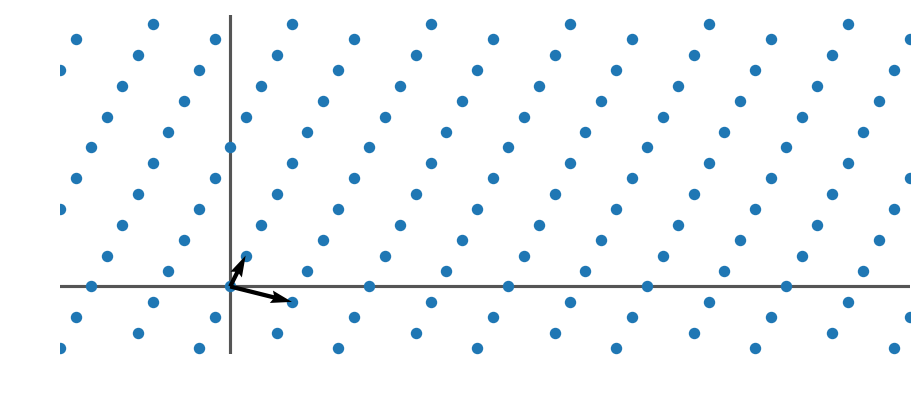

In [16]:
def figure1():
    fig, ax = plt.subplots(figsize=(8, 3), dpi=150)
    lattice(ax, [0.5,1], [2,-.5], s=20)
    axes(ax, xlim=[-5, 20])
    fig.savefig("figs/fig1.png", bbox_inches="tight")
    
figure1()

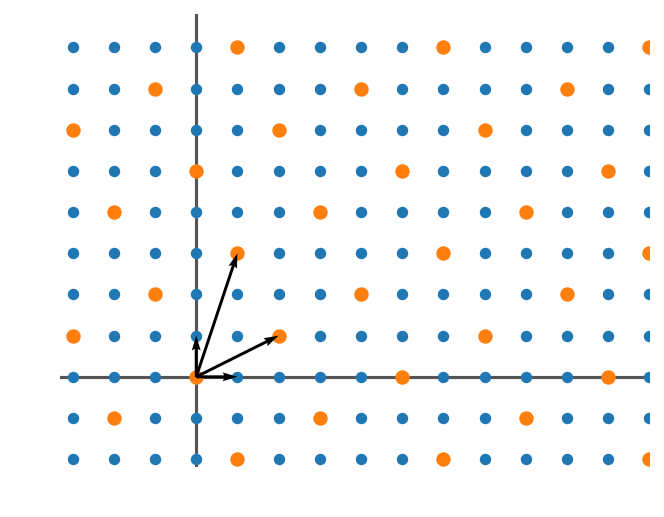

In [17]:
def figure2():
    fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
    lattice(ax, [1,0], [0,1], s=20)
    lattice(ax, [2,1], [1,3], s=35)
    axes(ax)
    fig.savefig("figs/fig2.png", bbox_inches="tight")
    
figure2()

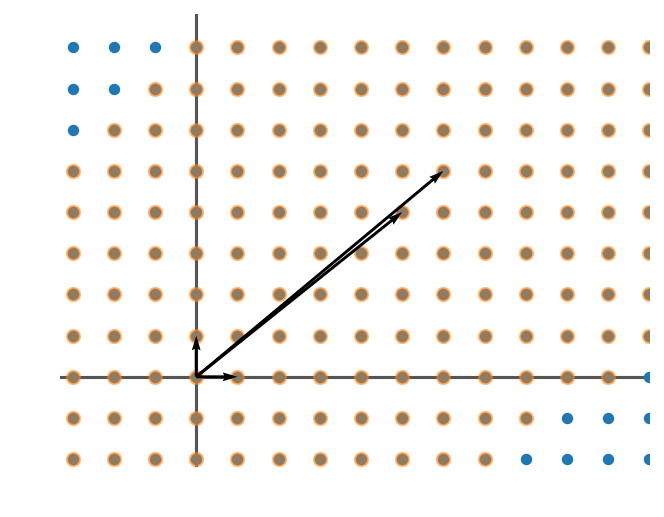

In [18]:
def figure3():
    fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
    lattice(ax, [1,0], [0,1], s=20)
    lattice(ax, [6,5], [5,4], s=40, alpha=.5)
    axes(ax)
    fig.savefig("figs/fig3.png", bbox_inches="tight")
    
figure3()

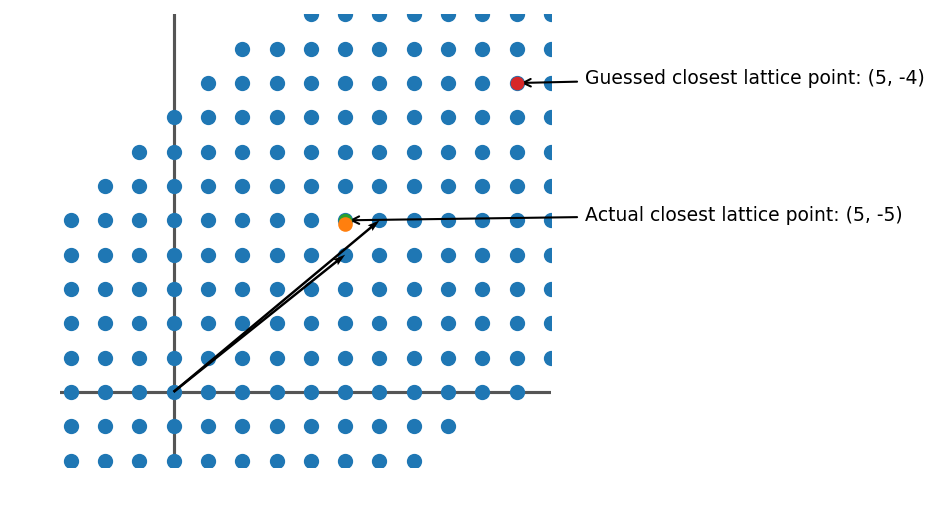

In [20]:
def figure4():
    fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
    lattice(ax, [6,5], [5,4], s=40)
    axes(ax, ylim=(-2,10))

    w = np.array([5, 4.9])
    B = np.array([[6, 5], [5, 4]])
    glp = (w @ inv(B)).round()
    alp = (w.round() @ inv(B))
    glpz = glp @ B
    alpz = alp @ B

    ax.scatter([w[0]], [w[1]], zorder=6)
    ax.scatter([alpz[0]], [alpz[1]], s=30, zorder=5)
    ax.scatter([glpz[0]], [glpz[1]], s=30, zorder=6)

    wl = (w @ inv(B)).round()
    wz = wl @ B
    ax.annotate(f"Guessed closest lattice point: ({glp[0]:.0f}, {glp[1]:.0f})",
                xy=glpz, xytext=(12, glpz[1]), arrowprops={"arrowstyle":"->"}, fontsize=9)
    ax.annotate(f"Actual closest lattice point: ({alp[0]:.0f}, {alp[1]:.0f})",
                xy=alpz, xytext=(12, alpz[1]), arrowprops={"arrowstyle":"->"}, fontsize=9)

    fig.savefig("figs/fig4.png", bbox_inches="tight")
    
    
figure4()

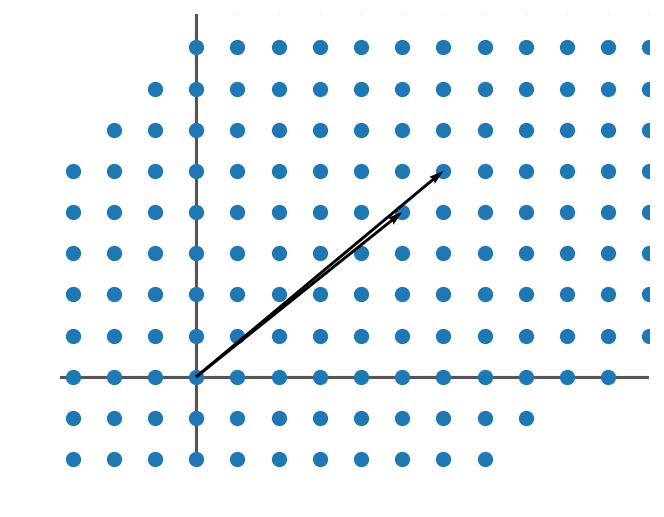

In [22]:
def figure5():
    fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
    lattice(ax, [6,5], [5,4], s=40)
    axes(ax)
    fig.savefig("figs/fig5.png", bbox_inches="tight")
    
figure5()

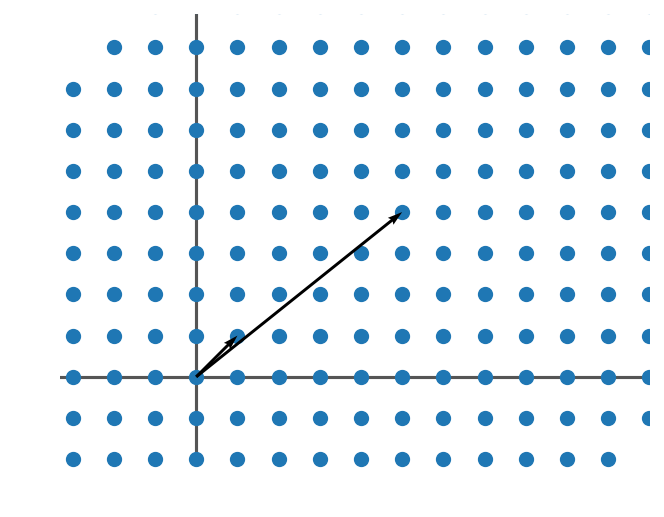

In [23]:
def figure6():
    fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
    lattice(ax, [1,1], [5,4], s=40)
    axes(ax)
    fig.savefig("figs/fig6.png", bbox_inches="tight")
    
figure6()

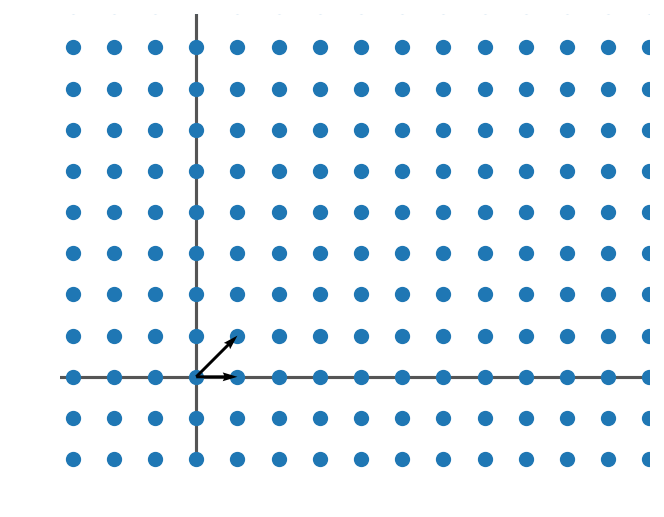

In [24]:
def figure7():
    fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
    lattice(ax, [1,1], [1,0], s=40)
    axes(ax)
    fig.savefig("figs/fig7.png", bbox_inches="tight")
    
figure7()

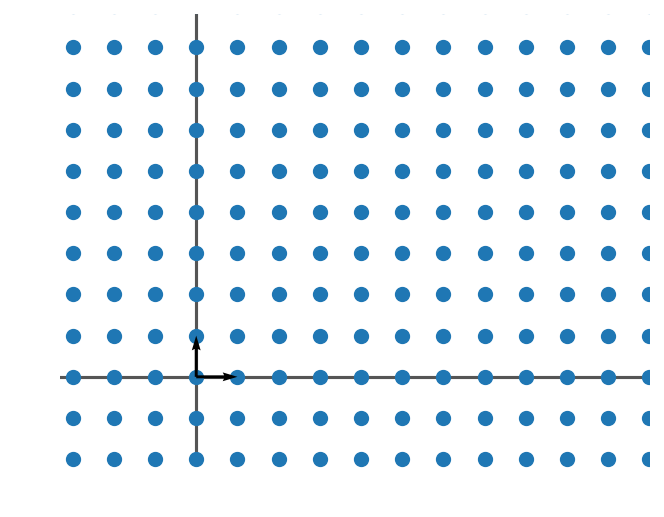

In [25]:
def figure8():
    fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
    lattice(ax, [0,1], [1,0], s=40)
    axes(ax)
    fig.savefig("figs/fig8.png", bbox_inches="tight")
    
figure8()

In [26]:
V = np.array([(-97, 19, 19), (-36, 30, 86), (-184, -64, 78)])
U = np.array([(4327, -15447, 23454), (3297, -11770, 17871), (5464, -19506, 29617)])
W = U @ V
m = np.array((86, -35, -32))
r = np.array((-4, -3, 2))
e = m @ W + r
(e @ inv(V)).round() @ V @ inv(W)

array([ 86.00000009, -35.00000001, -32.00000006])